In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
#Data Pre-processing
# Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head(), df.shape

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 (768, 9))

In [ ]:
# Data Analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


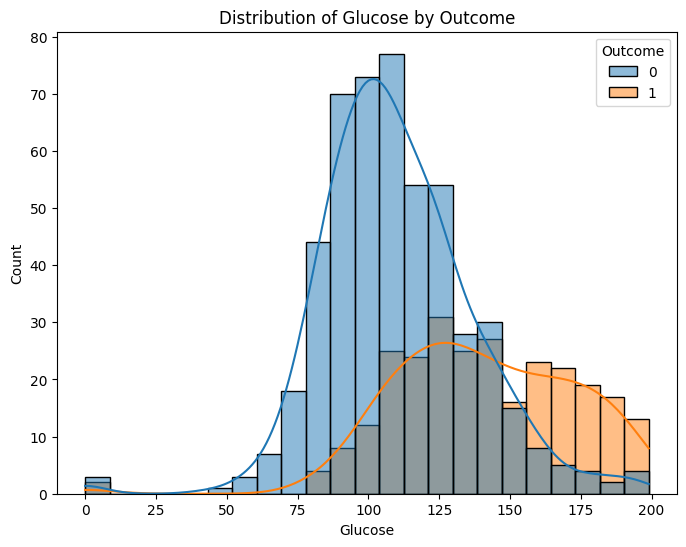

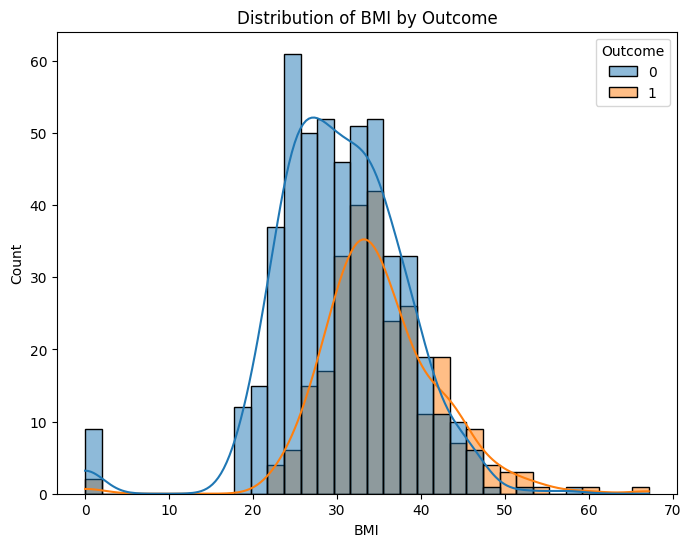

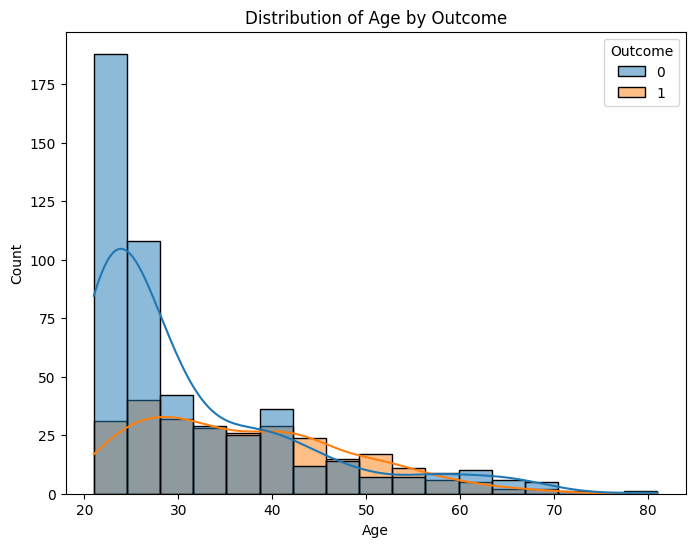

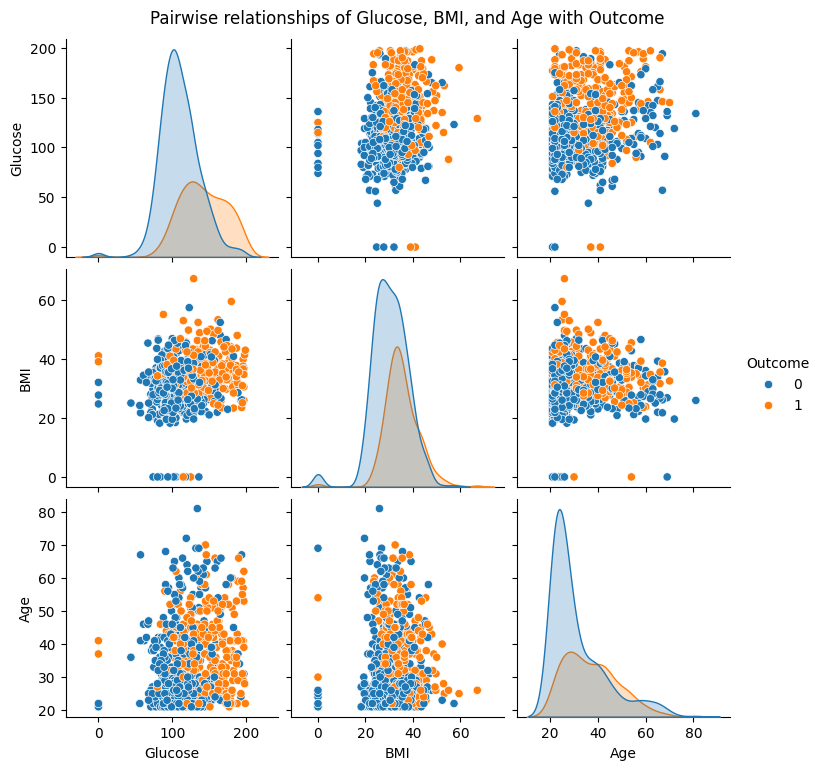

In [63]:

# Visualize the distribution of Glucose by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)
plt.title('Distribution of Glucose by Outcome')
plt.show()

# Visualize the distribution of BMI by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.title('Distribution of BMI by Outcome')
plt.show()

# Visualize the distribution of Age by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.title('Distribution of Age by Outcome')
plt.show()

# Visualize the relationship between two features and the outcome using a pairplot
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age'])
plt.suptitle('Pairwise relationships of Glucose, BMI, and Age with Outcome', y=1.02)
plt.show()

In [32]:
df.groupby("Outcome").size()

,0
Outcome,
0,500
1,268


In [33]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [44]:
# Data Standarization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df.drop(columns="Outcome", axis=1))


In [45]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [46]:
# Seperating Data and labels

X = standardized_data
Y = df["Outcome"]

In [47]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [52]:
X_train.shape, X_test.shape, X.shape, Y.shape

((614, 8), (154, 8), (768, 8), (768,))

In [53]:
Y_train.value_counts()

,count
Outcome,
0,400
1,214


In [54]:
# Model Training

classifier = svm.SVC(kernel="linear")

In [55]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [57]:
# Model Evaluation
# Training Data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Training data Accuracy Score: {training_data_accuracy}")

Training data Accuracy Score: 0.7866449511400652


In [58]:
# Testing Data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Testing data Accuracy Score: {testing_data_accuracy}")

Testing data Accuracy Score: 0.7727272727272727


In [59]:
# Predictive System
input_data = np.array([4,110,92,0,0,37.6,0.191,30])
type(input_data)

numpy.ndarray

In [62]:
input_data_reshaped = input_data.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


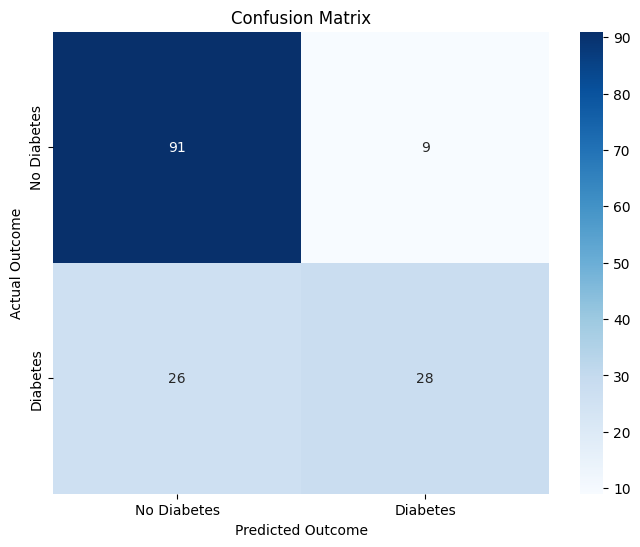

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Confusion Matrix')
plt.show()